In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


# unzip
import zipfile, os, shutil

dataset = '/content/gdrive/My Drive/kaggle/subset.zip'
dst_path = '/content/subset'
dst_file = os.path.join(dst_path, 'subset.zip') 

if not os.path.exists(dst_path):
  os.makedirs(dst_path)   

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.applications import DenseNet169

conv_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

51879936/51877672 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu') )
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(40, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
flatten_2 (Flatten)          (None, 487872)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               124895488 
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                10280     
Total params: 209,822,586
Trainable params: 209,625,918
Non-trainable params: 196,668
_________________________________________________________________


In [ ]:
conv_base.trainable = False


In [ ]:
import os 
import numpy as np 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2, zoom_range=0.2, horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')



Found 1967 images belonging to 40 classes.
Found 533 images belonging to 40 classes.


In [ ]:
,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'

In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
labels_batch

array([37., 13., 10., 13.,  7., 23., 28., 21., 27.,  3., 14., 33., 26.,
       16.,  4., 10., 27., 11.,  0., 15.], dtype=float32)

In [ ]:
'''
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
'''

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/densenet_aug/model.{epoch:02d}.hdf5'
modelckpt = ModelCheckpoint(filepath=filepath)



In [ ]:

model.compile(optimizer=optimizers.RMSprop(lr=1e-5), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=100,  
                    batch_size = 20,
                    validation_data=validation_generator,
                     callbacks=[modelckpt])

Epoch 1/100
99/99 [==============================] - 17s 176ms/step - loss: 0.1464 - acc: 0.9522 - val_loss: 0.4368 - val_acc: 0.8837
Epoch 2/100
99/99 [==============================] - 16s 157ms/step - loss: 0.1513 - acc: 0.9502 - val_loss: 0.4393 - val_acc: 0.8893
Epoch 3/100
99/99 [==============================] - 16s 158ms/step - loss: 0.1427 - acc: 0.9527 - val_loss: 0.4168 - val_acc: 0.8856
Epoch 4/100
99/99 [==============================] - 16s 157ms/step - loss: 0.1352 - acc: 0.9568 - val_loss: 0.4478 - val_acc: 0.8837
Epoch 5/100
99/99 [==============================] - 16s 158ms/step - loss: 0.1527 - acc: 0.9553 - val_loss: 0.4538 - val_acc: 0.8818
Epoch 6/100
99/99 [==============================] - 16s 157ms/step - loss: 0.1454 - acc: 0.9563 - val_loss: 0.4285 - val_acc: 0.8912
Epoch 7/100
99/99 [==============================] - 16s 157ms/step - loss: 0.1458 - acc: 0.9558 - val_loss: 0.4383 - val_acc: 0.8837
Epoch 8/100
99/99 [==============================] - 15s 157ms

In [ ]:
from keras.models import load_model

model.save('model.h5')
model.save_weights('/content/gdrive/My Drive/exp/weights_reset.hdf5')



앞서 설명했듯이,
우리의 Data set의 class는 40개이며,
class당 Data 수가 40-50개를 가지고 있는 굉장히 data 수가 부족한 data이다.

그렇기 때문에 학습에 overfitting되어 일반화된 모델이 안 나올 수 있는 위험도가 매우 높기 때문에 일반화 성능이 가장 좋은 Densenet으로 결정을 하였고,

이제 부터 Densenet의 어떤 구조가 model의 generazation에 도움되는 지 알아보겠다.



일단 conv망이 깊을 수록 디테일한 훈련이 가능 하지만, 훈련하기 힘들며, 수렴하는데 오랜 시간이 걸린다.

하지만 Densenet은 얕은 모델에서 뛰어난 성능을 보여주기 때문에 혁신적인 네트워크 구조 이기도 하다.
장점 
1. 그라디언트 소실 문제 완화
2. 퍼포먼스를 유지하면서 깊이를 줄임


이러한 장점은
skip layer라고 불리는 각 conv block이 연결되어 이전 정보를 가져올 수 있는 구조 때문이다. 



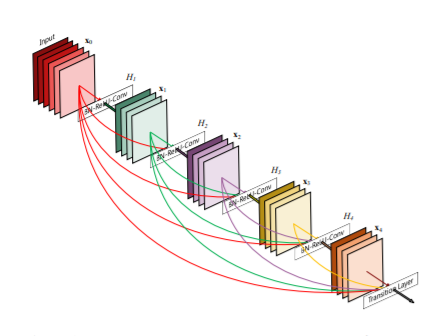

더 자세하게 알아보자면, 이 구조는 네트워크의 layer 간 information
flow를 극대화하기 위해, feature-map size가 동일한 모든 layer가 직접 연결됩니다. 이로 인해 L개의 connection 대신 L(L+1)/2 개의
connection 아키텍처를 가지게 됨으로서 Feature들이 summation 되지 않고 concatenation이 되므로, 앞서 말한 문제점의 해결과 동시에
선행 layer에서 후속 layer로 향하는 short path를 가지게 되며 이런 구조를 DenseNet이라고 부릅니다.
앞의 이유로 CNN구조 중 DenseNet을 사용하기로 결정을 하였고,
augment 전에도 가장 높은 정확도를 가지고 있으며, 후에는 그 차이가 다소 완하되지만, 모델의 깊이에 따른 파라미터의 개수와 퍼포먼스를 비교했을 때,
성능과 학습속도를 다 고려해서 densenet을 결정하기로하였다.




하이퍼 파라미터를 결정할 때는 데이터수가 적기 때문에 pretrained 된 모델을 결정했으므로, optimizer, node 수, epoch등을 고려하기로 하였다. 

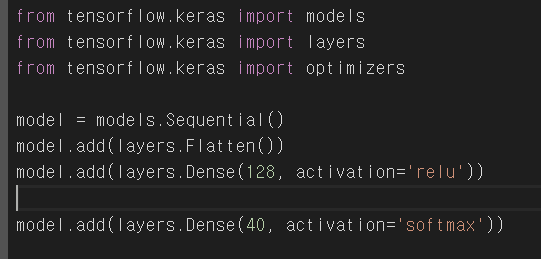

image.png

앞의 256의 node 수 와 dropout0.5 계수를
128로 바꿨을때 정확도가 떨어져서 underfitting이 되며
노드수를 512로 올리기, layer를 한 층 더 쌓기 등을 했을 시 val_acc가 낮아지는 overfitting 현상이 올르며,

optimizer 부분에서 adam, sgd rmsporp 등 모든 optimzer를 다 사용해보았을때

adam과 rmsprob이 안정적인 acc을 가지지만 큰 차이가 없어서 더 빠르게 학습이 가능한 rmsprob을 채택하게 되었다.
